# Assignment 2 #
### Due: Friday, September 27 to be submitted via Canvas by 11:59 pm ###
### Total points: **90** ###

## Name(s) and EID(s):

### Sushanth Ravichandran
### Sankeerth


Your homework should be written in a python notebook. There will be two submissions:

*   Exported PDF uploaded to Gradescope
*   ipynb file uploaded to Canvas

If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Gradescope and Canvas but make sure to include both students' names and UT EIDs.**  

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook and PDF before submitting. (%matplotlib inline)

# Question 1: Bias and Variance (**10 pts**)

(a) (**4 pts**) Describe the difference between model bias (bias of a regression model) and the bias of a point estimator (e.g. an estimator of what percentage of students at UT prefer Fall to Spring).

(b) (**6 pts**). How can you use a learning curve to determine whether a model is overfitting  (for a given sample size)? Discuss this with respect to the observed train and validation error curves. How does your answer change if the model you are trying to determine is underfitting?

## Answer

#### a.) Model Bias vs Bias of a point estimator
***Model bias*** refers to the error introduced by assuming that the underlying relationship between the independent variables (predictors) and the dependent variable (outcome) can be represented by a certain model.For example, if we use a linear regression model to represent a relationship that is actually quadratic, the model's bias would be high because it cannot capture the true relationship. 

***The bias of a point estimator*** measures the difference between the expected value of the estimator and the true value of the population parameter being estimated. For example, if you're estimating the percentage of students at UT who prefer Fall to Spring, bias is the extent to which the average estimate from repeated samples deviates from the true percentage.
We have control over reducing the model bias by picking the right model however the bias of a point of estimator might just be due to the noice which is not in our control

b.) 

***Overfitting*** occurs when a model learns the training data/curve too well, including noise and irrelevant details, but fails to generalize to new data. Training Error: In an overfitted model, the training error will be very low. This means the model fits the training data almost perfectly. ***Validation Error:*** The validation error, however, will be much higher than the training error and might plateau early without decreasing further as more data is added.

***Underfitting*** occurs when the model is too simple and cannot capture the underlying patterns in the data. ***Training Error:*** The training error will be high because the model is not complex enough to capture the data patterns, even on the training set.
***Validation Error:*** The validation error will also be high and close to the training error, indicating that the model is not performing well on both training and validation data.

# Question 2: The Effect of Degree in Polynomial Models (25 pts)
Follow the instructions below to build polynomial models that can predict $y$ for input $x$ in the dataset ```data.npy```.

In [2]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import random
seed = 123
random.seed(seed)
np.random.seed(seed)

In [19]:
# Only use this code block if you are using Google Colab.
from google.colab import files

# It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
# Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [4]:
data_load = np.load('./data.npy', allow_pickle = True)
x_train = data_load.item().get("x_train")
y_train = data_load.item().get("y_train")
x_test = data_load.item().get("x_test")
y_test =data_load.item().get("y_test")
x_all = np.linspace(-10,10,101).reshape(-1,1)

In [14]:
x_test

array([-1.00367905,  3.60571445,  1.85595153,  0.78926787, -2.75185088,
       -2.75204384, -3.5353311 ,  2.92940917,  0.80892009,  1.66458062,
       -3.83532405,  3.75927882,  2.65954113, -2.30128711, -2.54540026,
       -2.53276392, -1.56606206,  0.19805145, -0.54443985, -1.67016688,
        0.89482316, -2.88404911, -1.66284281, -1.06910525, -0.35144013,
        2.28140769, -2.40260974,  0.11387551,  0.73931655, -3.6283967 ])

(a) (10 pts) Implement the following two functions:

```python
def make_polynomial_features_and_standardize(deg, x_train, x_test, x_all):
```
*   Make the ```deg```-degree polynomial features of ```x_train```, ```x_test```, and ```x_all```: ```x_poly_train```, ```x_poly_test```, and ```x_poly_all```, respectively.
*   Fit a ```StandardScaler``` on ```x_poly_train``` and scale ```x_poly_train```, ```x_poly_test```, and ```x_poly_all```, resulting in ```x_poly_scaled_train```, ```x_poly_scaled_test```, and ```x_poly_scaled_all``` and return them.

```python
def plot_curves(x_train, y_train, x_test, y_test, x_all):
```
*   Fit polynomial models of degrees 3, 5, 21 to the training data.
*   Print out the mean squared error on both train and test sets for all the models.
*   Plot the data points (y_train v.s. x_train and y_test v.s. x_test)and the fitted models (predictions on x_all by different models vs x_all). Everything must be in the same figure and be clearly labeled.
*   Return the lists of train and test MSEs.

Tips: you can use ```np.vander(np.squeeze(x_train), deg+1)``` to generate the deg-degree polynomial vector of x_train. For example, ```np.vander(np.squeeze(x_train), 3)``` gives you the second-degree polynomial of x_train.


In [10]:
def make_polynomial_features_and_standardize(deg, x_train, x_test, x_all):
    # Make the deg-degree polynomial features
    ### START CODE ###
    x_poly_train = np.vander(np.squeeze(x_train), deg + 1)
    x_poly_test = np.vander(np.squeeze(x_test), deg + 1)
    x_poly_all = np.vander(np.squeeze(x_all), deg + 1)
    ### END CODE ###

    scaler = StandardScaler()
    # Scale the data
    ### START CODE ###
    # fit the scaler
    x_poly_scaled_train = scaler.fit_transform(x_poly_train)
    x_poly_scaled_test = scaler.transform(x_poly_test)
    x_poly_scaled_all = scaler.transform(x_poly_all)
    ### END CODE ###
    return x_poly_scaled_train, x_poly_scaled_test, x_poly_scaled_all

def plot_curves(x_train, y_train, x_test, y_test, x_all):
    degs = [3, 5, 21]
    fig, ax = plt.subplots(1, 1, figsize=(8,8))

    # Plot the train and test data
    ax.plot(x_train, y_train,'ok', label='Train data')
    ax.plot(x_test, y_test, 'or', label='Test data')

    # Train and test MSE lists
    mse_train_list = []
    mse_test_list = []

    for deg in degs:
        x_poly_scaled_train, x_poly_scaled_test, x_poly_scaled_all = make_polynomial_features_and_standardize(deg, x_train, x_test, x_all)

        # Create a linear model and fit on the train data
        ### START CODE ###
        model = LinearRegression()
        model.fit(x_poly_scaled_train, y_train)
        ### END CODE ###

        # Generate the predictions for train set, test set, and x_all
        ### START CODE ###
        y_pred_train = model.predict(x_poly_scaled_train)
        y_pred_test = model.predict(x_poly_scaled_test)
        y_all = model.predict(x_poly_scaled_all)
        ### END CODE ###

        # compute train and test mean squared error, append to the train and test MSE lists
        ### START CODE ###
        mse_train = mean_squared_error(y_train, y_pred_train)
        mse_test = mean_squared_error(y_test, y_pred_test)
        mse_train_list.append(mse_train)
        mse_test_list.append(mse_test)
        ### END CODE ###
        ax.plot(x_all, y_all ,label='degree %d' % deg)
        ax.legend(loc=2)

        print(f"Degree: {deg} Train MSE: {round(mse_train, 3)} Test MSE: {round(mse_test, 3)}")

    # Limit the graph to visualize the plot better
    ax.set_ylim([-100,100])
    ax.set_xlim([-5,5])
    plt.show()
    return mse_train_list, mse_test_list


Degree: 3 Train MSE: 164.219 Test MSE: 204.143
Degree: 5 Train MSE: 76.147 Test MSE: 79.604
Degree: 21 Train MSE: 66.223 Test MSE: 101.477


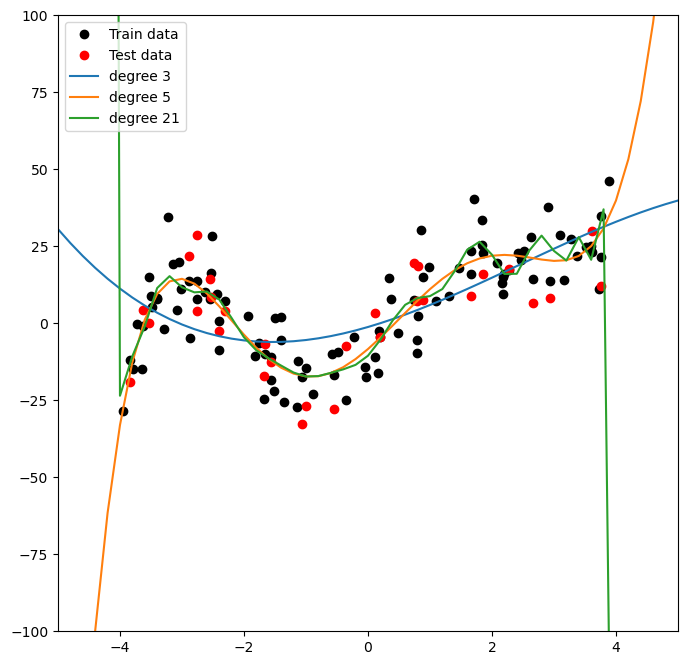

In [50]:
_, _ = plot_curves(x_train, y_train, x_test, y_test, x_all)

(b) (5 pts) Which model gives the best performance? Explain in terms of the bias-variance tradeoff.

### Answer
The best model is the one that achieves a good balance between bias and variance, which can be evaluated based on the Train and Test Mean Squared Errors (MSE) in the context of the bias-variance tradeoff. The ***degree 5*** model gives the best performance. It has relatively low training and test errors, and the small gap between the two suggests it balances the bias-variance tradeoff well.

(c) (5 pts) Now add a code block which trains a polynomial model of degree 21 **with $L_2$ regularization**. The regularization strength $\alpha$ is determined by 5-fold cross-validation, and examining alpha values in the range: ```alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]```

In [56]:
def plot_curves_with_regularized(x_train, y_train, x_test, y_test, x_all):
    degs = [3, 5, 21]
    fig, ax = plt.subplots(1, 1, figsize=(8,8))

    # Plot the train and test data
    ax.plot(x_train, y_train,'ok', label='Train data')
    ax.plot(x_test, y_test, 'or', label='Test data')

    # Train and test MSE lists
    mse_train_list = []
    mse_test_list = []
    for deg in degs:
        ### COPY YOUR IMPLEMENTATION BELOW ###
        x_poly_scaled_train, x_poly_scaled_test, x_poly_scaled_all = make_polynomial_features_and_standardize(deg, x_train, x_test, x_all)

        # Create a linear model and fit on the train data
        ### START CODE ###
        model = LinearRegression()
        model.fit(x_poly_scaled_train, y_train)
        ### END CODE ###

        # Generate the predictions for train set, test set, and x_all
        ### START CODE ###
        y_pred_train = model.predict(x_poly_scaled_train)
        y_pred_test = model.predict(x_poly_scaled_test)
        y_all = model.predict(x_poly_scaled_all)
        ### END CODE ###

        # compute train and test mean squared error, append to the train and test MSE lists
        ### START CODE ###
        mse_train = mean_squared_error(y_train, y_pred_train)
        mse_test = mean_squared_error(y_test, y_pred_test)
        mse_train_list.append(mse_train)
        mse_test_list.append(mse_test)

        ### END CODE ###
        ax.plot(x_all, y_all ,label='degree %d' % deg)
        ax.legend(loc=2)

        print(f"Degree: {deg} Train MSE: {round(mse_train, 3)} Test MSE: {round(mse_test, 3)}")
        ### COPY YOUR IMPLEMENTATION ABOVE ###

    deg = 21
    x_poly_scaled_train, x_poly_scaled_test, x_poly_scaled_all = make_polynomial_features_and_standardize(deg, x_train, x_test, x_all)

    # L2 regularization coefficient
    alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]
    # Do 5-fold cross validation using sklearn.model_selection.KFold with random_state set to seed
    ### START CODE ###
    num_fold = 5
    kf = KFold(n_splits=num_fold, shuffle=True, random_state=42)
    ### END CODE ###
    min_mse, min_mse_alpha = np.inf, None
    for alpha in alphas:
        avg_mse_val = 0
        for i, (train_index, val_index) in enumerate(kf.split(x_poly_scaled_train)):
            # Do train/val split
            ### START CODE ###
            x_poly_scaled_train_split = x_poly_scaled_train[train_index]
            y_train_split = y_train[train_index]
            x_poly_scaled_val_split = x_poly_scaled_train[val_index]
            y_val_split = y_train[val_index]
            ### END CODE ###

            # Create and fit a ridge regression model using alpha to the training data, and evaluate its MSE on the validation data
            ### START CODE ###
            ridge = Ridge(alpha=alpha)
            ridge.fit(x_poly_scaled_train_split, y_train_split)
            y_pred_val = ridge.predict(x_poly_scaled_val_split)
            mse_val = mean_squared_error(y_val_split, y_pred_val)
            avg_mse_val += mse_val

            ### END CODE ###
        avg_mse_val /= num_fold
        if avg_mse_val < min_mse:
            # Identify the best alpha that leads to the minimum validation MSE
            ### START CODE ###
            min_mse = avg_mse_val
            min_mse_alpha = alpha
            ### END CODE ###

    # Create and fit a ridge regression model using the best alpha you found
    ### START CODE ###
    ridge = Ridge(alpha=min_mse_alpha)
    ridge.fit(x_poly_scaled_train, y_train)

    ### END CODE ###

    # Generate the predictions for train set, test set, and x_all
    ### START CODE ###
    y_pred_train = ridge.predict(x_poly_scaled_train)
    y_pred_test = ridge.predict(x_poly_scaled_test)
    y_all = ridge.predict(x_poly_scaled_all)
    ### END CODE ###

    # compute train and test mean squared error, append to the train and test MSE lists
    ### START CODE ###
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    ### END CODE ###

    ax.plot(x_all, y_all ,label='degree %d L2 regularized' % deg)
    ax.legend(loc=2)

    print(f"Degree: {deg} (L2 regularized) Train MSE: {mse_train} Test MSE: {mse_test}")

    # print(np.mean(x_poly_scaled_train, axis=0), np.std(x_poly_scaled_train, axis=0))

    # Limit the graph to visualize the plot better
    ax.set_ylim([-100,100])
    ax.set_xlim([-5,5])
    plt.show()
    return mse_train_list, mse_test_list

Degree: 3 Train MSE: 164.219 Test MSE: 204.143
Degree: 5 Train MSE: 76.147 Test MSE: 79.604
Degree: 21 Train MSE: 66.223 Test MSE: 101.477
Degree: 21 (L2 regularized) Train MSE: 72.16320962190133 Test MSE: 76.97248464544484


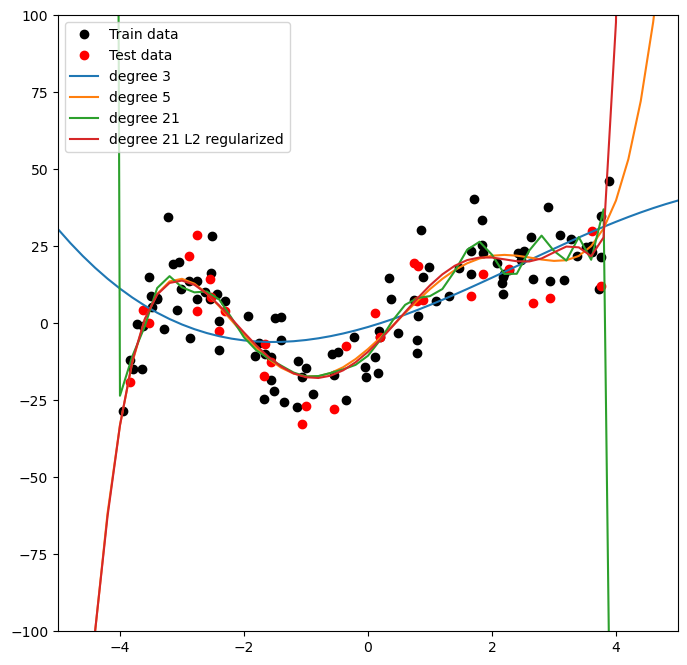

In [58]:
_, _ = plot_curves_with_regularized(x_train, y_train, x_test, y_test, x_all)

#### Analysis
Incorporating these regularization parameters has significantly improved the performance of the degree 21 polynomial model by effectively reducing the weights of several non-performing coefficients. Consequently, this has enhanced the overall model performance, making it one of the best-performing models.



(d) (5 pts) Analyse how the training data size affects the train and test errors of the models. For this, run the analysis in (a) using 25, 50, 75 and all 100 data points. Make a single plot of the  𝑙𝑜𝑔(𝑀𝑆𝐸)'s on train & test datasets v.s. the size of the training set for the polynomials of degree 5 and 21. There will be 4 lines in total (2 polynomials $\times$ train & test datasets). **State the trends you see as you change the size of the training data on each of the models and explain why you see them.**

## Answer


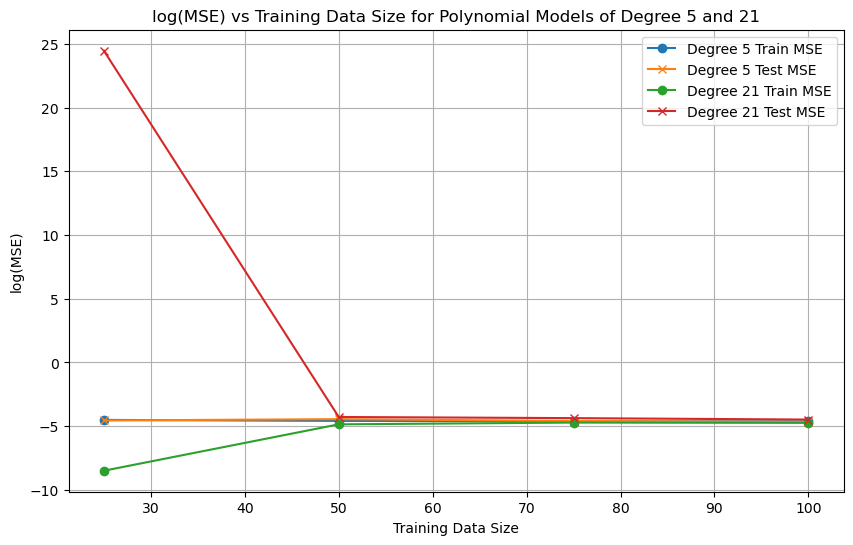

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Function to create polynomial features and standardize them
def make_polynomial_features_and_standardize(deg, x_train, x_test, x_all):
    x_poly_train = np.vander(np.squeeze(x_train), deg + 1)
    x_poly_test = np.vander(np.squeeze(x_test), deg + 1)
    x_poly_all = np.vander(np.squeeze(x_all), deg + 1)

    scaler = StandardScaler()
    x_poly_scaled_train = scaler.fit_transform(x_poly_train)
    x_poly_scaled_test = scaler.transform(x_poly_test)
    x_poly_scaled_all = scaler.transform(x_poly_all)

    return x_poly_scaled_train, x_poly_scaled_test, x_poly_scaled_all

# Function to run analysis for different training set sizes
def analyze_training_size_effects(x_train_full, y_train_full, x_test, y_test, x_all):
    train_sizes = [25, 50, 75, 100]  # Training data sizes
    degs = [5, 21]  # Polynomial degrees
    log_mse_train = {5: [], 21: []}  # Dictionary to store log(MSE) for train data
    log_mse_test = {5: [], 21: []}   # Dictionary to store log(MSE) for test data

    for deg in degs:
        for size in train_sizes:
            # Use the first `size` points of the full training set
            x_train_subset = x_train_full[:size]
            y_train_subset = y_train_full[:size]

            # Get polynomial features
            x_poly_scaled_train, x_poly_scaled_test, x_poly_scaled_all = make_polynomial_features_and_standardize(deg, x_train_subset, x_test, x_all)

            # Train model
            model = LinearRegression()
            model.fit(x_poly_scaled_train, y_train_subset)

            # Predict on train and test sets
            y_pred_train = model.predict(x_poly_scaled_train)
            y_pred_test = model.predict(x_poly_scaled_test)

            # Calculate MSE for train and test sets
            mse_train = mean_squared_error(y_train_subset, y_pred_train)
            mse_test = mean_squared_error(y_test, y_pred_test)

            # Store log(MSE)
            log_mse_train[deg].append(np.log(mse_train))
            log_mse_test[deg].append(np.log(mse_test))

    # Plot the results
    plt.figure(figsize=(10, 6))
    for deg in degs:
        plt.plot(train_sizes, log_mse_train[deg], label=f'Degree {deg} Train MSE', marker='o')
        plt.plot(train_sizes, log_mse_test[deg], label=f'Degree {deg} Test MSE', marker='x')

    plt.xlabel('Training Data Size')
    plt.ylabel('log(MSE)')
    plt.title('log(MSE) vs Training Data Size for Polynomial Models of Degree 5 and 21')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Example data generation (replace with actual data if available)
np.random.seed(0)
x_train_full = np.sort(5 * np.random.rand(100, 1) - 2.5)  # Training data (100 points)
y_train_full = np.sin(x_train_full).ravel() + 0.1 * np.random.randn(100)  # Sine wave with noise

x_test = np.sort(5 * np.random.rand(50, 1) - 2.5)  # Test data (50 points)
y_test = np.sin(x_test).ravel() + 0.1 * np.random.randn(50)  # Sine wave with noise

x_all = np.linspace(-3, 3, 100).reshape(-1, 1)  # All x points for plotting the curve

# Run the analysis
analyze_training_size_effects(x_train_full, y_train_full, x_test, y_test, x_all)


### Analysis
From my analysis of the log MSE versus training set size plot, it's evident that the simpler polynomial model (degree 5) exhibits minimal sensitivity to changes in training set size. This suggests that its higher bias prevents significant variations in MSE as the amount of training data increases. Conversely, the more complex model (degree 21) demonstrates a pronounced sensitivity to training data size. As the training set expands, its MSE stabilizes, reflecting a reduction in variance. This indicates that with an adequate volume of data points, the model begins to generalize better. Ultimately, after reaching a sufficient threshold of training examples, the primary contributors to MSE shift to bias and noise, rather than variance, emphasizing the trade-off between bias and variance in model performance.

# Question 3: Stochastic Gradient Descent Improvements (10 pts)

### Part 1. (**5 pts**) ##
Read this [blog](https://medium.com/optimization-algorithms-for-deep-neural-networks/gradient-descent-with-momentum-dce805cd8de8) on medium and describe in your own words how momentum leads to a faster convergence of the loss function.

***Answer***

Momentum accelerates gradient descent by smoothing the direction of updates. In traditional gradient descent, each step is determined by the gradient at the current point, which can lead to oscillations, particularly in steep regions of the loss function. Momentum helps by maintaining a running average of past gradients, which dampens these oscillations. This enables faster movement in the correct direction and smoother convergence toward the minimum. The algorithm effectively takes larger steps in flat regions and smaller, more stable steps in steep areas.


## Part 2. (**5 pts**) ##
Read this [article](https://www.geeksforgeeks.org/regularization-by-early-stopping/) and explain in your own words how early stopping helps prevent overfitting.

### ***Answer***
Early stopping helps prevent overfitting by halting the training process once the model's performance on a validation set starts to decline. This occurs when the model continues to improve on the training data but begins to perform worse on unseen data. By stopping at the optimal point before overfitting, early stopping ensures that the model generalizes better to new data while preventing it from becoming overly complex. This technique also reduces the amount of training time required compared to other regularization methods.

# Question 4: Visualizing Gradient Descent (**15 pts**) #

## Part 1. **(10 pts)** Coding ##

In this exercise, you are going to visualize four steps of gradient descent on linear regression with two parameters.

The true target function is $y = \theta_{0} + \theta_{1}x$ where $\theta_{0}=5$ and $\theta_{1}=-2$.

Try the following two initializations:
* $\theta_{0}=0$ and $\theta_{1}=0$
* $\theta_{0}=0$ and $\theta_{1}=3$

and try the following three learning rates:
* 0.5
* 1
* 2.1

Therefore, there will be **six** combinations in total. For each setting, you will plot (a) the data and the changing linear regression models and (b) the model parameters moving over the loss landscape.

In [76]:
# Generate data
np.random.seed(42)
m = 20
theta0_true = 5
theta1_true = -2
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x + np.random.normal(0, 0.2, size=x.shape)

In [82]:
def loss_func(theta0, theta1):
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y - model(x, theta0, theta1))**2, axis=2)/2

def model(x, theta0, theta1):
    return theta0 + theta1 * x

# Gradient computation function
def compute_gradients(theta0, theta1):
    y_pred = model(x, theta0, theta1)
    dtheta0 = np.mean(y_pred - y)  # Gradient wrt theta0
    dtheta1 = np.mean((y_pred - y) * x)  # Gradient wrt theta1
    return dtheta0, dtheta1

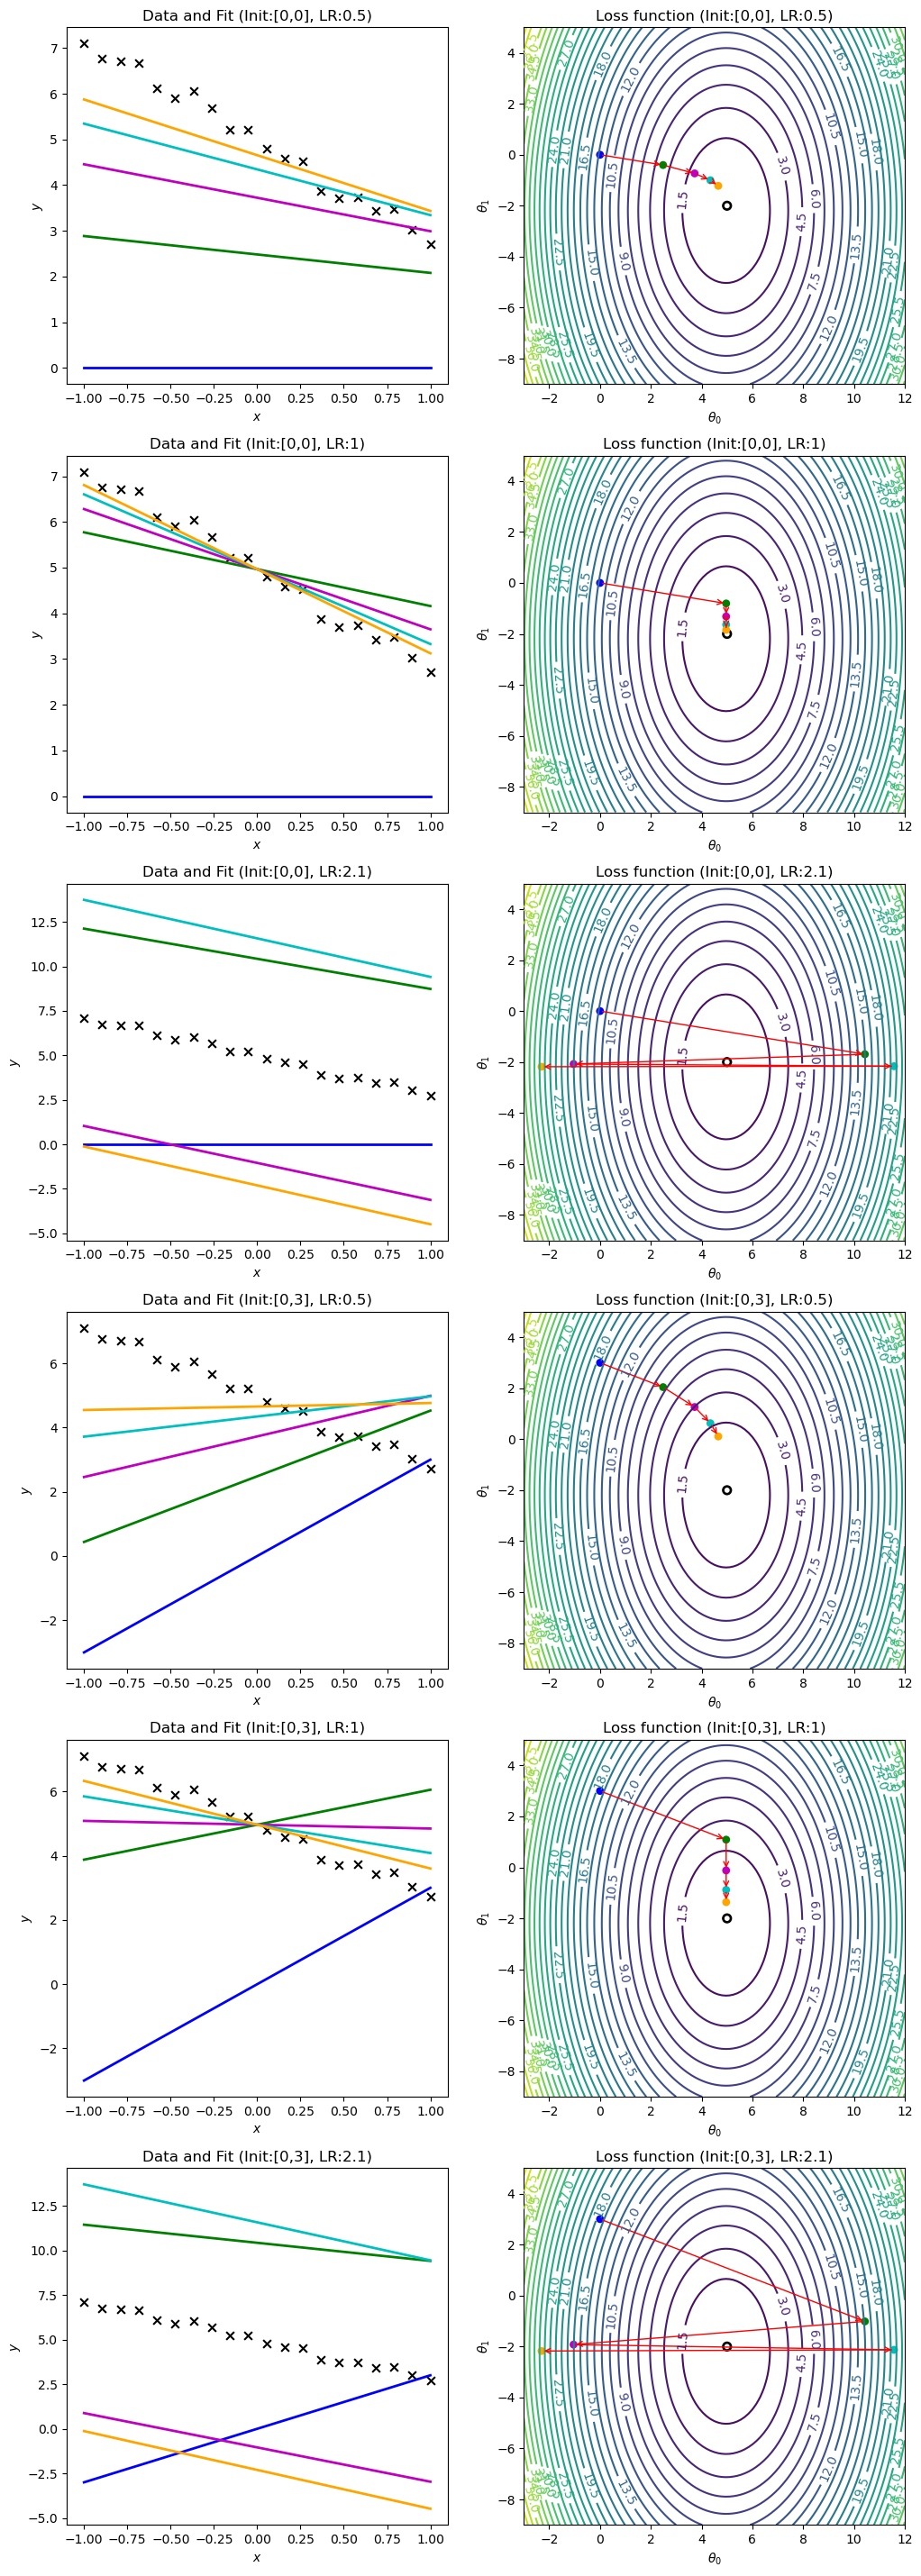

In [84]:
# Experiment with different initialization and learning rate combinations
### START CODE ###
init_list = [(0, 0), (0, 3)]  # Initialize theta0 and theta1
lr_list = [0.5, 1, 2.1]  # Learning rates
### END CODE ###

# Left column shows the data and the changing linear regression models
# Right column shows the model parameters moving over the loss landscape
fig, ax = plt.subplots(nrows=len(init_list) * len(lr_list), ncols=2, figsize=(12, 36))

for i, init in enumerate(init_list):
    for j, lr in enumerate(lr_list):
        row_idx = i * len(lr_list) + j
        ax[row_idx][0].scatter(x, y, marker='x', s=40, color='k')
        theta0_grid = np.linspace(-3,12,101)
        theta1_grid = np.linspace(-9,5,101)
        L_grid = loss_func(theta0_grid[np.newaxis,:,np.newaxis],
                           theta1_grid[:,np.newaxis,np.newaxis])

        # A labeled contour plot for the right column
        X, Y = np.meshgrid(theta0_grid, theta1_grid)
        contours = ax[row_idx][1].contour(X, Y, L_grid, 30)
        ax[row_idx][1].clabel(contours)
        # The target parameter values indicated on the loss function contour plot
        ax[row_idx][1].scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

        # Take N = 4 steps with learning rate alpha down the steepest gradient, starting at init
        N = 4
        theta = [init] # placeholder list for storing historical parameters
        L = [loss_func(*theta[0])[0]] # placeholder list for storing historical loss values
        for _ in range(N):
            last_theta = theta[-1]
            this_theta = np.empty((2,))
            # Update theta
            ### START CODE ### (2 lines of code)
            dtheta0, dtheta1 = compute_gradients(last_theta[0], last_theta[1])
            this_theta[0] = last_theta[0] - lr * dtheta0
            this_theta[1] = last_theta[1] - lr * dtheta1
            ### END CODE ###
            theta.append(this_theta)
            L.append(loss_func(*this_theta))

        # Annotate the loss function plot with coloured points indicating the
        # parameters chosen and red arrows indicating the steps down the gradient.
        # Also plot the fit function on the LHS data plot in a matching colour.
        colors = ['b', 'g', 'm', 'c', 'orange']
        ax[row_idx][0].plot(x, model(x, *theta[0]), color=colors[0], lw=2,
                   label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))
        for k in range(1,N+1):
            ax[row_idx][1].annotate('', xy=theta[k], xytext=theta[k-1],
                           arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                           va='center', ha='center')
            ax[row_idx][0].plot(x, model(x, *theta[k]), color=colors[k], lw=2,
                   label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[k]))
        ax[row_idx][1].scatter(*zip(*theta), c=colors, s=40, lw=0)

        # Labels and titles.
        ax[row_idx][1].set_xlabel(r'$\theta_0$')
        ax[row_idx][1].set_ylabel(r'$\theta_1$')
        ax[row_idx][1].set_title(f'Loss function (Init:[{init[0]},{init[1]}], LR:{lr})')
        ax[row_idx][0].set_xlabel(r'$x$')
        ax[row_idx][0].set_ylabel(r'$y$')
        ax[row_idx][0].set_title(f'Data and Fit (Init:[{init[0]},{init[1]}], LR:{lr})')
        axbox = ax[row_idx][0].get_position()

plt.show()

## Part 2. **(3 pts)** ##
Briefly explain how initialization affects optimization.

Initialization significantly impacts the optimization process in gradient-based methods like gradient descent. A poor initialization, where the starting values are far from the optimal solution, can lead to slower convergence as the algorithm takes more steps to reach the minimum. Good initialization, on the other hand, speeds up convergence by starting closer to the optimal values. Additionally, in non-convex problems, initialization can determine whether the algorithm finds the global minimum or gets stuck in a local minimum, potentially resulting in suboptimal solutions. The choice of initialization also affects the sensitivity to the learning rate; if initialized poorly with a large learning rate, the optimization may diverge or oscillate, preventing it from converging to a solution. Therefore, initialization is crucial in shaping the efficiency and outcome of optimization.








## Answer ##

## Part 3. (**2 pts**) ##
Briefly explain how learning rate affects optimization.

The learning rate is a critical hyperparameter in optimization that controls the step size during gradient descent updates. If the learning rate is too high, the optimization process may overshoot the optimal solution, leading to divergence or oscillation. Conversely, if the learning rate is too low, the algorithm will converge very slowly, requiring many iterations to reach the minimum. An appropriate learning rate balances the trade-off, ensuring efficient and stable convergence toward the optimal solution. Thus, selecting the right learning rate is crucial for the effectiveness and speed of the optimization process.

## Answer ##

# Question 5: Stochastic Gradient Descent (30 pts)

## Part 1. (**10 pts**) Stochastic gradient descent derivation ##

Use stochastic gradient descent to derive the coefficent updates for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：

$$ y = w_0 + w_1log(x_1) + w_2 x_2^2 + w_3x_1e^{-x_2} $$




### To derive the coefficient updates for the model 

\[
y = w_0 + w_1 \log(x_1) + w_2 x_2^2 + w_3 x_1 e^{-x_2}
\]

using Stochastic Gradient Descent (SGD), we follow these steps:

### Step 1: Define the Loss Function
The Mean Squared Error (MSE) loss function for a single data point \((x_1, x_2, y)\) is defined as:

\[
L(w) = \frac{1}{2} (y - \hat{y})^2
\]

where \(\hat{y} = w_0 + w_1 \log(x_1) + w_2 x_2^2 + w_3 x_1 e^{-x_2}\).

### Step 2: Compute the Gradient
We calculate the gradients of the loss function with respect to each coefficient:

1. **Gradient with respect to \(w_0\)**:

\[
\frac{\partial L}{\partial w_0} = -(y - \hat{y})
\]

2. **Gradient with respect to \(w_1\)**:

\[
\frac{\partial L}{\partial w_1} = -(y - \hat{y}) \cdot \log(x_1)
\]

3. **Gradient with respect to \(w_2\)**:

\[
\frac{\partial L}{\partial w_2} = -(y - \hat{y}) \cdot x_2^2
\]

4. **Gradient with respect to \(w_3\)**:

\[
\frac{\partial L}{\partial w_3} = -(y - \hat{y}) \cdot x_1 e^{-x_2}
\]

### Step 3: Update Rules
The updates for each coefficient \(w_j\) at iteration \(t\) are given by:

\[
w_j^{(t+1)} = w_j^{(t)} - \eta \frac{\partial L}{\partial w_j}
\]

Thus, the updates for the coefficients are:

1. **Update for \(w_0\)**:

\[
w_0^{(t+1)} = w_0^{(t)} + \eta (y - \hat{y})
\]

2. **Update for \(w_1\)**:

\[
w_1^{(t+1)} = w_1^{(t)} + \eta (y - \hat{y}) \cdot \log(x_1)
\]

3. **Update for \(w_2\)**:

\[
w_2^{(t+1)} = w_2^{(t)} + \eta (y - \hat{y}) \cdot x_2^2
\]

4. **Update for \(w_3\)**:

\[
w_3^{(t+1)} = w_3^{(t)} + \eta (y - \hat{y}) \cdot x_1 e^{-x_2}
\]

### Summary
The stochastic gradient descent updates for the coefficients \(w_0\), \(w_1\), \(w_2\), and \(w_3\) in the given model can be expressed as:

- \(w_0^{(t+1)} = w_0^{(t)} + \eta (y - \hat{y})\)
- \(w_1^{(t+1)} = w_1^{(t)} + \eta (y - \hat{y}) \cdot \log(x_1)\)
- \(w_2^{(t+1)} = w_2^{(t)} + \eta (y - \hat{y}) \cdot x_2^2\)
- \(w_3^{(t+1)} = w_3^{(t)} + \eta (y - \hat{y}) \cdot x_1 e^{-x_2}\)


## Part 2. (**20 pts**) Stochastic gradient descent coding ##

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1log(x_1) + w_2 x_2^2 + w_3x_1e^{-x_2} $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values).

a) (**15 pts**) Use the expression derived in part 1 to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) .

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

In [7]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:

    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        # initialize whichever variables you would need here
        self.coef = np.zeros(4)

    def sgd(self, gradient):
        # Update the self.coef using SGD
        ### START CODE ###
        ## W - n(gradient)
        self.coef -= self.learning_rate * gradient
        ### END CODE ###

    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                ### START CODE ###
                #error = 0.5*((y[i] - self.linearPredict(X[i:i+1]))^2)
                error = (y[i] - self.linearPredict(X[i:i+1]))
                ### END CODE ###

                # Compute gradients
                ### START CODE ###
                gradient = -error * X[i] + self.regularization * self.coef
                ### END CODE ###

                # Update weights
                ### START CODE ###
                self.sgd(gradient)
                ### END CODE ###

            #coefs.append(self.coef)
            coefs.append(self.coef.copy())
            residuals = y - self.linearPredict(X)
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = np.log(X[:,0])
        x[:,2] = X[:,1]**2
        x[:,3] = X[:,0]*np.exp(-1*X[:,1])

        return x

    def linearPredict(self, X):
        # Compute the dot product of self.coef and X
        ### START CODE ###
        return np.dot(X, self.coef)
        ### END CODE ###

In [9]:
data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 1, 10, 100]

In [11]:
# Iterate through all combinations of learning rates and regularization strength
# Use your Regression class to fit the data and record MSEs
### START CODE ###
results = []
for lr in learning_rate:
    for reg in regularization:
        regressor = Regression(learning_rate=lr, regularization=reg, n_epoch=n_epochs)
        regressor.fit(X, y)
        results.append((lr, reg, regressor.lowest_mse))

# Sort results
results = sorted(results, key=lambda x: x[2])  
best_combinations = results[:2]  

### END CODE ###

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14524\3170204776.py:37: RuntimeWarning: overflow encountered in multiply
  gradient = -error * X[i] + self.regularization * self.coef
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14524\3170204776.py:20: RuntimeWarning: invalid value encountered in subtract
  self.coef -= self.learning_rate * gradient
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14524\3170204776.py:48: RuntimeWarning: overflow encountered in square
  mse.append(np.mean(residuals**2))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14524\3170204776.py:37: RuntimeWarning: invalid value encountered in multiply
  gradient = -error * X[i] + self.regularization * self.coef
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14524\3170204776.py:20: RuntimeWarning: overflow encountered in multiply
  self.coef -= self.learning_rate * gradient


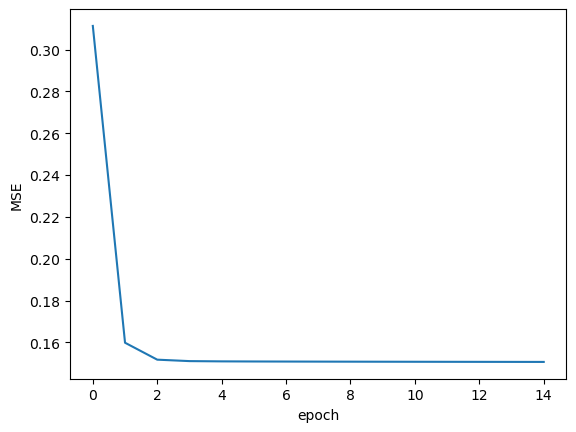

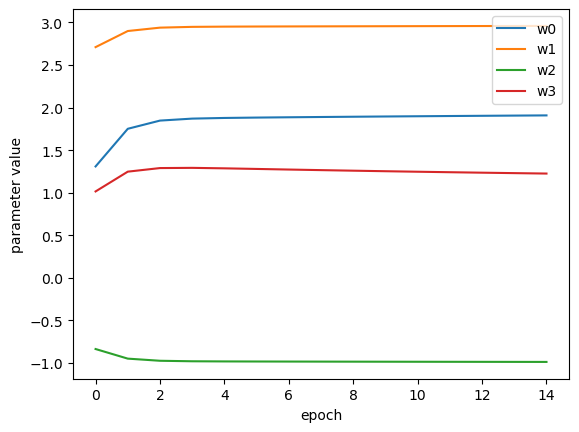

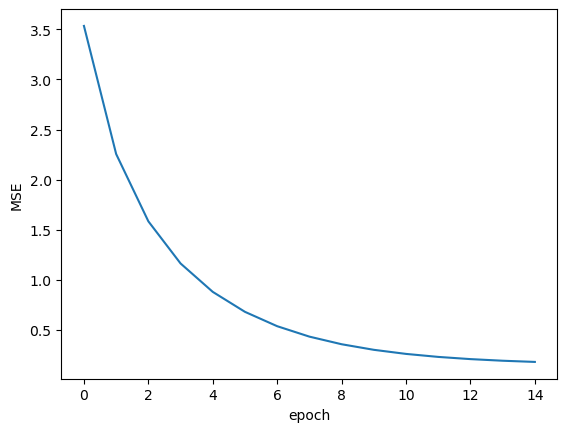

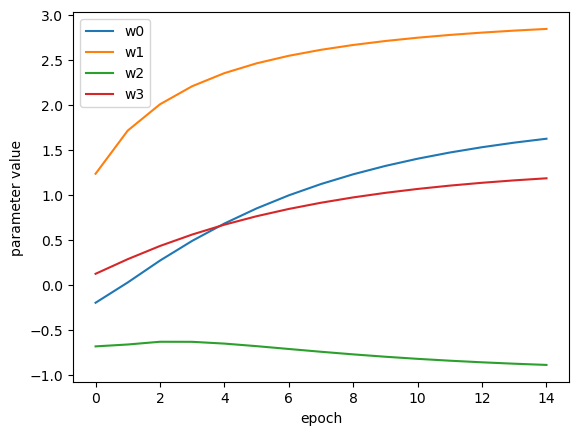

In [12]:
# For the best two combinations, use the plot option in Regression.fit() to plot MSE and parameters as a function of epoch (15 epochs)
### START CODE ###
regressor1 = Regression(learning_rate=best_combinations[0][0], regularization=best_combinations[0][1], n_epoch=n_epochs)
regressor1.fit(X, y, plot=True)

regressor2 = Regression(learning_rate=best_combinations[1][0], regularization=best_combinations[1][1], n_epoch=n_epochs)
regressor2.fit(X, y, plot=True)

### END CODE ###